Probability of releasing k quanta (n=10, p=0.2):
  P(X=0) = 0.1074
  P(X=1) = 0.2684
  P(X=2) = 0.3020
  P(X=3) = 0.2013
  P(X=4) = 0.0881
  P(X=5) = 0.0264
  P(X=6) = 0.0055
  P(X=7) = 0.0008
  P(X=8) = 0.0001
  P(X=9) = 0.0000


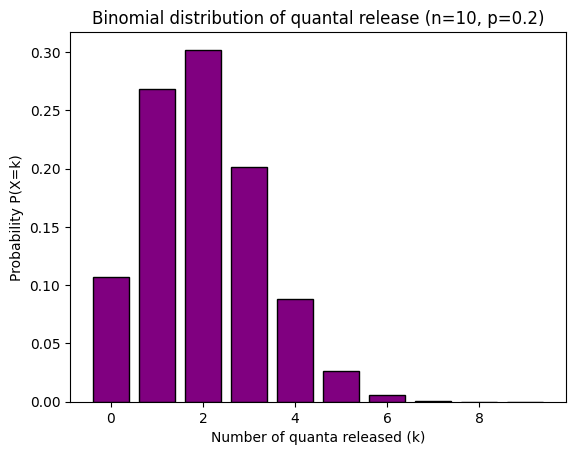

In [14]:
#EXERCISE 1
import numpy as np
import scipy.stats as stats

# -----------------------------
# Parameters for the binomial model
# -----------------------------
n = 10       # number of available quanta in the presynaptic terminal
p = 0.2      # probability of release for each quantum

# -----------------------------
# Generate possible outcomes
# -----------------------------
# The possible number of quanta that can be released is from 0 to n
k_values = np.arange(0, 10, 1)  # makes an array [0,1,2,...,10]

# -----------------------------
# Calculate probabilities
# -----------------------------
# For each possible number of quanta released (k),
# we calculate the probability using the binomial PMF (probability mass function).
probabilities = stats.binom.pmf(k_values, n, p)

# -----------------------------
# Print the results clearly
# -----------------------------
print("Probability of releasing k quanta (n=10, p=0.2):")
for k, prob in zip(k_values, probabilities):
    print(f"  P(X={k}) = {prob:.4f}")

# -----------------------------
# Optional: visualize the distribution
# -----------------------------
import matplotlib.pyplot as plt

plt.bar(k_values, probabilities, color="purple", edgecolor="black")
plt.xlabel("Number of quanta released (k)")
plt.ylabel("Probability P(X=k)")
plt.title("Binomial distribution of quantal release (n=10, p=0.2)")
plt.show()

Likelihood of observing 8 releases (n=14):
  p=0.1 → Likelihood = 0.000016
  p=0.2 → Likelihood = 0.002015
  p=0.3 → Likelihood = 0.023180
  p=0.4 → Likelihood = 0.091821
  p=0.5 → Likelihood = 0.183289
  p=0.6 → Likelihood = 0.206598
  p=0.7 → Likelihood = 0.126202
  p=0.8 → Likelihood = 0.032244
  p=0.9 → Likelihood = 0.001293
  p=1.0 → Likelihood = 0.000000


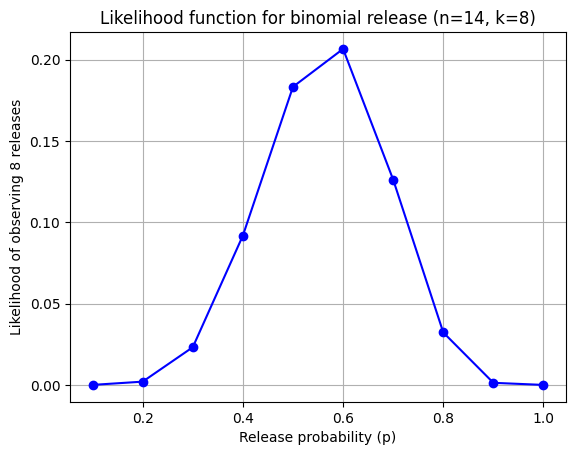


Most likely release probability given the data: p = 0.6


In [2]:
#EXERCISE 2 part 1
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

n = 14   # number of available quanta
k_obs = 8

p_values = np.linspace(0.1, 1.0, 10)  # test p = 0.1, 0.2, ..., 1.0

likelihoods = stats.binom.pmf(k_obs, n, p_values)

print("Likelihood of observing 8 releases (n=14):")
for p, L in zip(p_values, likelihoods):
    print(f"  p={p:.1f} → Likelihood = {L:.6f}")

plt.plot(p_values, likelihoods, marker="o", color="blue")
plt.xlabel("Release probability (p)")
plt.ylabel("Likelihood of observing 8 releases")
plt.title("Likelihood function for binomial release (n=14, k=8)")
plt.grid(True)
plt.show()

best_p = p_values[np.argmax(likelihoods)]
print(f"\nMost likely release probability given the data: p = {best_p:.1f}")

P(X=8 | n=14, p=0.1) = 0.00001596
P(X=8 | n=14, p=0.7) = 0.12620227

p	Likelihood P(X=8 | n=14, p)
0.1	0.00001596
0.2	0.00201528
0.3	0.02318001
0.4	0.09182116
0.5	0.18328857
0.6	0.20659761
0.7	0.12620227
0.8	0.03224447
0.9	0.00129269
1.0	0.00000000

Most likely decile (highest likelihood among deciles): p = 0.6
Analytic MLE (k/n) = 0.571429
Grid-based MLE ~ p = 0.5714 (should be ≈ k/n)


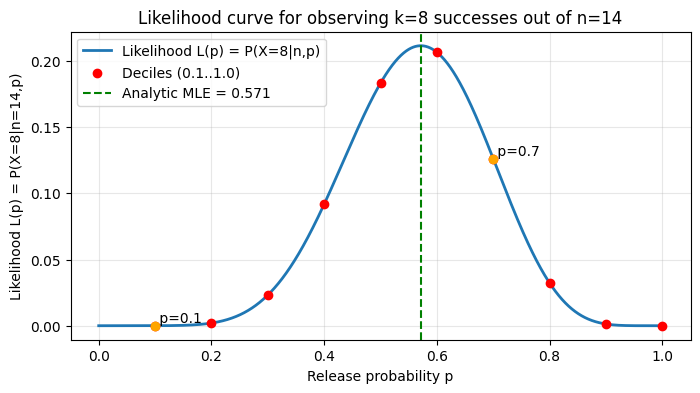

/tmp/ipython-input-106049880.py:75: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  lik_norm = lik_fine / np.trapz(lik_fine, ps_fine)  # area-normalized for plotting convenience


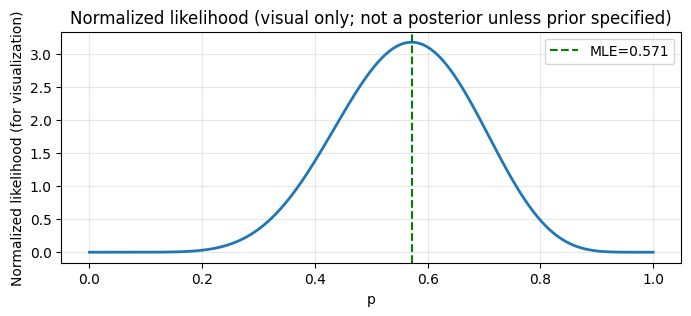

In [4]:
#EXERCISE 2 part 2
# Beginner-friendly script: likelihood for binomial data (n=14, k=8)
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

# -----------------------------
# Given data
# -----------------------------
n = 14            # number of quanta available
k = 8             # observed number released

# -----------------------------
# 1) Probability for specific p values (0.1 and 0.7)
# -----------------------------
p1 = 0.1
p2 = 0.7
lik_p1 = binom.pmf(k, n, p1)   # P(X = k | n, p1)
lik_p2 = binom.pmf(k, n, p2)   # P(X = k | n, p2)

print(f"P(X={k} | n={n}, p={p1}) = {lik_p1:.8f}")
print(f"P(X={k} | n={n}, p={p2}) = {lik_p2:.8f}")
print()

# -----------------------------
# 2) Likelihoods for each decile 0.1, 0.2, ..., 1.0
# -----------------------------
ps_deciles = np.linspace(0.1, 1.0, 10)
lik_deciles = binom.pmf(k, n, ps_deciles)

print("p\tLikelihood P(X=8 | n=14, p)")
for p, L in zip(ps_deciles, lik_deciles):
    print(f"{p:.1f}\t{L:.8f}")

# Which decile is largest?
best_idx = np.argmax(lik_deciles)
best_decile = ps_deciles[best_idx]
print(f"\nMost likely decile (highest likelihood among deciles): p = {best_decile:.1f}")

# -----------------------------
# 3) Analytic MLE and fine-grid MLE
# -----------------------------
# Analytic MLE for p in binomial is k/n
p_mle_analytic = k / n
print(f"Analytic MLE (k/n) = {p_mle_analytic:.6f}")

ps_fine = np.linspace(0, 1, 10001)    # step 0.0001
lik_fine = binom.pmf(k, n, ps_fine)
max_idx = np.argmax(lik_fine)
p_mle_grid = ps_fine[max_idx]
print(f"Grid-based MLE ~ p = {p_mle_grid:.4f} (should be ≈ k/n)")
# -----------------------------
# 4) Plot the likelihood function
# -----------------------------
plt.figure(figsize=(8,4))
plt.plot(ps_fine, lik_fine, '-', lw=2, label='Likelihood L(p) = P(X=8|n,p)')
# Mark decile points
plt.scatter(ps_deciles, lik_deciles, color='red', zorder=5, label='Deciles (0.1..1.0)')
# Mark analytic MLE
plt.axvline(p_mle_analytic, color='green', linestyle='--', label=f'Analytic MLE = {p_mle_analytic:.3f}')
# Mark p=0.1 and p=0.7
plt.scatter([p1, p2], [lik_p1, lik_p2], color='orange', zorder=6)
plt.text(p1, lik_p1, f" p={p1}", va='bottom', ha='left')
plt.text(p2, lik_p2, f" p={p2}", va='bottom', ha='left')

plt.xlabel('Release probability p')
plt.ylabel(f'Likelihood L(p) = P(X={k}|n={n},p)')
plt.title(f'Likelihood curve for observing k={k} successes out of n={n}')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# -----------------------------
# 5) (Optional) For visualization only: normalized likelihood (not a probability prior-free)
# -----------------------------
lik_norm = lik_fine / np.trapz(lik_fine, ps_fine)  # area-normalized for plotting convenience

plt.figure(figsize=(8,3))
plt.plot(ps_fine, lik_norm, lw=2)
plt.axvline(p_mle_analytic, color='green', linestyle='--', label=f'MLE={p_mle_analytic:.3f}')
plt.xlabel('p')
plt.ylabel('Normalized likelihood (for visualization)')
plt.title('Normalized likelihood (visual only; not a posterior unless prior specified)')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

At p = 0.1:
  L1 = P(k1=8 | n=14, p=0.1) = 1.5959173e-05
  L2 = P(k2=5 | n=14, p=0.1) = 0.0077561582
  Total likelihood = L1 * L2 = 1.2378187e-07
  Total log-likelihood = ln(L_total) = -15.9047

p 	 Total Likelihood (P(k1)*P(k2))
0.0	0
0.1	1.23782e-07
0.2	0.000173284
0.3	0.00455058
0.4	0.01897
0.5	0.0223965
0.6	0.00843113
0.7	0.00083582
0.8	1.08303e-05
0.9	1.52817e-09
1.0	0

Best decile (highest likelihood): p = 0.5

Analytic MLE (k_total / n_total) = 0.464286
Grid-based MLE (fine scan) = 0.464300


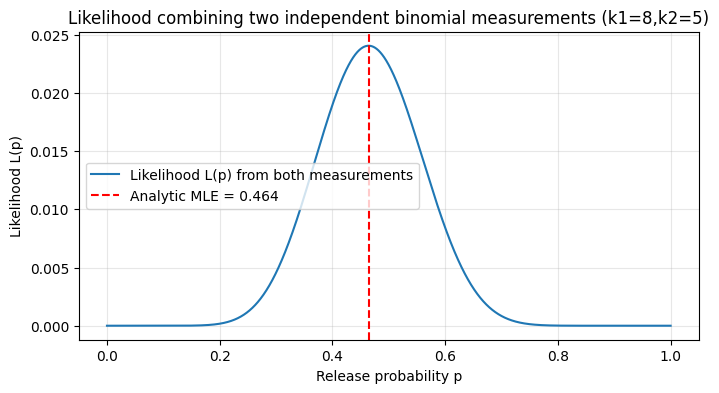

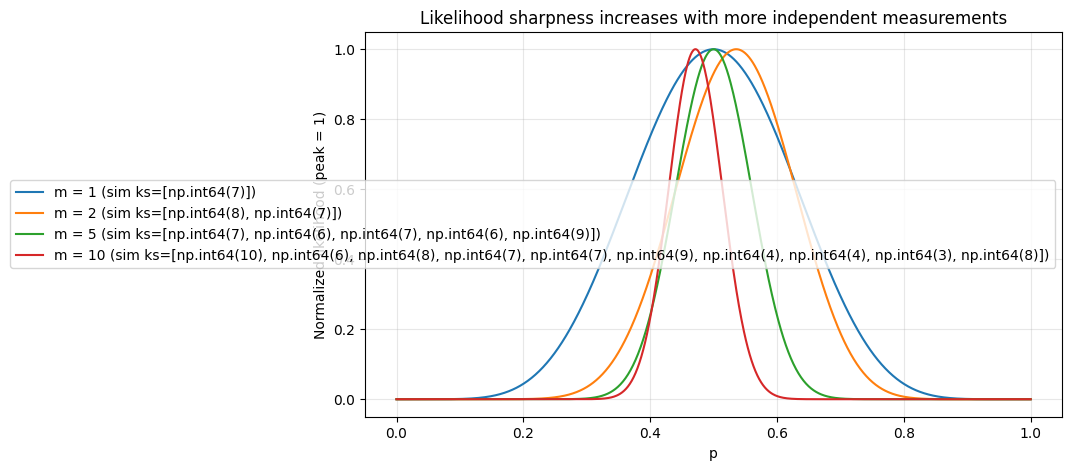

In [4]:
#EXERCISE 3
# Likelihood combining two independent binomial measurements
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

# -----------------------
# Given experimental data
# -----------------------
n = 14           # number of quanta per measurement (same for both)
k1 = 8           # observed successes in measurement 1
k2 = 5           # observed successes in measurement 2

# -----------------------
# (A) Total likelihood at p = 0.1
# -----------------------
p_test = 0.1
L1 = binom.pmf(k1, n, p_test)  # probability of k1 given p_test
L2 = binom.pmf(k2, n, p_test)  # probability of k2 given p_test
L_total_p01 = L1 * L2          # product because measurements are independent
logL_total_p01 = np.log(L_total_p01) if L_total_p01 > 0 else -np.inf

print("At p = 0.1:")
print(f"  L1 = P(k1=8 | n=14, p=0.1) = {L1:.8g}")
print(f"  L2 = P(k2=5 | n=14, p=0.1) = {L2:.8g}")
print(f"  Total likelihood = L1 * L2 = {L_total_p01:.8g}")
print(f"  Total log-likelihood = ln(L_total) = {logL_total_p01:.4f}")
print()

# -----------------------
# (B) Likelihood for decile p values 0.0..1.0
# -----------------------
deciles = np.linspace(0.0, 1.0, 11)  # [0.0, 0.1, ..., 1.0]
lik_deciles = []

for p in deciles:
    # For p equal to 0 or 1 some pmf values may be exactly zero when k>0 or k<n
    L1_p = binom.pmf(k1, n, p)
    L2_p = binom.pmf(k2, n, p)
    Ltot = L1_p * L2_p
    lik_deciles.append(Ltot)

# Show the table
print("p \t Total Likelihood (P(k1)*P(k2))")
for p, L in zip(deciles, lik_deciles):
    print(f"{p:.1f}\t{L:.6g}")

# Which decile is best?
best_idx = int(np.argmax(lik_deciles))
print(f"\nBest decile (highest likelihood): p = {deciles[best_idx]:.1f}")

# -----------------------
# (C) Fine-grid MLE search and analytic MLE
# -----------------------
ps_fine = np.linspace(0.0, 1.0, 10001)   # 0.0001 steps
lik_fine = binom.pmf(k1, n, ps_fine) * binom.pmf(k2, n, ps_fine)
max_idx = np.argmax(lik_fine)
p_mle_grid = ps_fine[max_idx]

# Analytic MLE for combined data (total successes / total trials)
p_mle_analytic = (k1 + k2) / (n + n)

print(f"\nAnalytic MLE (k_total / n_total) = {p_mle_analytic:.6f}")
print(f"Grid-based MLE (fine scan) = {p_mle_grid:.6f}")

# Plot the likelihood curve (fine grid) and mark the MLE
plt.figure(figsize=(8,4))
plt.plot(ps_fine, lik_fine, lw=1.5, label='Likelihood L(p) from both measurements')
plt.axvline(p_mle_analytic, color='red', linestyle='--', label=f'Analytic MLE = {p_mle_analytic:.3f}')
plt.xlabel('Release probability p')
plt.ylabel('Likelihood L(p)')
plt.title('Likelihood combining two independent binomial measurements (k1=8,k2=5)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# -----------------------
# (D) Demonstration: how likelihood sharpens with more independent measurements
# We will simulate extra independent measurements assuming a true underlying p_true,
# aggregate them, and plot likelihood curves for sample sizes m = 1, 2, 5, 10.
# -----------------------
np.random.seed(0)

p_true = p_mle_analytic  # use the current MLE as a plausible "true" value to demo
n_repeats_list = [1, 2, 5, 10]   # number of independent measurements we aggregate
ps = np.linspace(0.0, 1.0, 1001)

plt.figure(figsize=(9,5))
for m in n_repeats_list:
    # simulate m independent experiments: draw m binomial outcomes k_i ~ Binom(n, p_true)
    simulated_ks = binom.rvs(n, p_true, size=m)
    # compute total likelihood (product across i) for each candidate p in 'ps'
    # Equivalent to computing binom.pmf(k_i, n, p) for each and multiplying across i
    # Here we compute aggregated likelihood by multiplying pmfs
    liks = np.ones_like(ps)
    for k_obs in simulated_ks:
        liks *= binom.pmf(k_obs, n, ps)
    # normalize for plotting (optional) so curves fit on the same vertical scale
    liks_norm = liks / np.max(liks) if np.max(liks) > 0 else liks
    plt.plot(ps, liks_norm, label=f'm = {m} (sim ks={list(simulated_ks)})')

plt.xlabel('p')
plt.ylabel('Normalized likelihood (peak = 1)')
plt.title('Likelihood sharpness increases with more independent measurements')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [8]:
#EXERCISE 4 part 1 - computation only
# Requires: numpy, scipy (optional for optimizer), matplotlib (optional for plotting)
import numpy as np
from math import comb
from scipy.optimize import minimize_scalar  # optional, for bonus numerical fit
import matplotlib.pyplot as plt

# -----------------------
#input data as dictionary
# -----------------------
# dictionary: key = number of quanta observed (k), value = how many experiments had that k
counts = {
    0:0, 1:0, 2:3, 3:7, 4:10, 5:19, 6:26,
    7:16, 8:16, 9:5, 10:5, 11:0, 12:0, 13:0, 14:0
}

n = 14  # number of available quanta per experiment

# -----------------------
# Compute basic pooled quantities
# -----------------------
N_total = sum(counts.values())                     # total experiments (here 107)
total_successes = sum(k * c for k, c in counts.items())  # total observed released quanta across all experiments

# Analytic MLE: total successes / total trials
p_hat_analytic = total_successes / (n * N_total)

print("Total experiments (from counts):", N_total)
print("Total observed successes:", total_successes)
print(f"Analytic MLE p_hat = {p_hat_analytic:.6f}")
print("Rounded to 0.01 resolution:", round(p_hat_analytic, 2))

# -----------------------
# Grid based estimate at resolution 0.01 (0.00..1.00) to find best p among deciles/centiles
# -----------------------
ps_grid = np.arange(0.00, 1.001, 0.01)  # p values stepping by 0.01
def log_likelihood(p):
    # compute log-likelihood of all observations for parameter p
    # sum_{k} count_k * log[ C(n,k) p^k (1-p)^(n-k) ]
    if p <= 0 or p >= 1:
        return -np.inf
    s = 0.0
    for k, c in counts.items():
        if c == 0:
            continue
        # log binomial pmf: log(C(n,k)) + k*log(p) + (n-k)*log(1-p)
        s += c * (np.log(comb(n, k)) + k * np.log(p) + (n - k) * np.log(1 - p))
    return s

ll_grid = np.array([log_likelihood(p) for p in ps_grid]) #log-likelihood value for each candidate
best_idx = np.argmax(ll_grid) #index of max log-likelihood in array, i.e. where likelihood is highest (MLE)
best_p_grid = ps_grid[best_idx] #best_idx where MLE is located - identify based on log function and pull it out
print(f"Best p on 0.01 grid: p = {best_p_grid:.2f} (log-likelihood = {ll_grid[best_idx]:.3f})")


Total experiments (from counts): 107
Total observed successes: 653
Analytic MLE p_hat = 0.435915
Rounded to 0.01 resolution: 0.44
Best p on 0.01 grid: p = 0.44 (log-likelihood = -218.594)


Total experiments (from counts): 107
Total observed successes: 653
Analytic MLE p_hat = 0.435915
Rounded to 0.01 resolution: 0.44
Best p on 0.01 grid: p = 0.44 (log-likelihood = -218.594)
Numeric optimization p_hat = 0.435914
Matches analytic pooled MLE: 0.43591455273698265


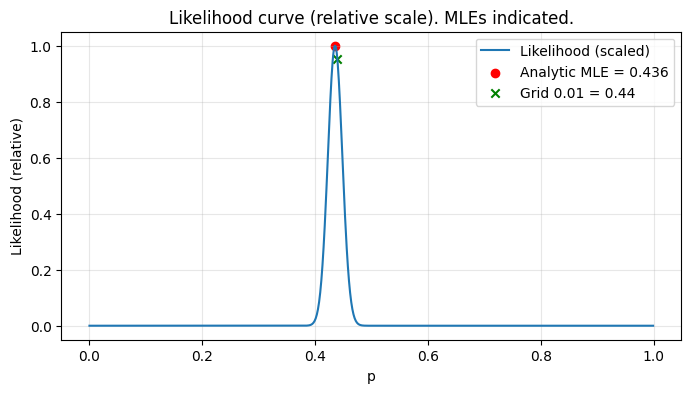

In [ ]:
#EXERCISE 4 part 2 - graphing included
# Requires: numpy, scipy (optional for optimizer), matplotlib (optional for plotting)
import numpy as np
from math import comb
from scipy.optimize import minimize_scalar  # optional, for bonus numerical fit
import matplotlib.pyplot as plt

# -----------------------
# INPUT: your observed counts
# -----------------------
# dictionary: key = number of quanta observed (k), value = how many experiments had that k
counts = {
    0:0, 1:0, 2:3, 3:7, 4:10, 5:19, 6:26,
    7:16, 8:16, 9:5, 10:5, 11:0, 12:0, 13:0, 14:0
}

n = 14  # number of available quanta per experiment

# -----------------------
# Compute basic pooled quantities
# -----------------------
N_experiments = sum(counts.values())                     # total experiments (here 107)
total_successes = sum(k * c for k, c in counts.items())  # total observed released quanta across all experiments

# Analytic MLE: total successes / total trials
p_hat_analytic = total_successes / (n * N_experiments)

print("Total experiments (from counts):", N_experiments)
print("Total observed successes:", total_successes)
print(f"Analytic MLE p_hat = {p_hat_analytic:.6f}")
print("Rounded to 0.01 resolution:", round(p_hat_analytic, 2))

# -----------------------
# Grid search at resolution 0.01 (0.00..1.00) to find best p among deciles/centiles
# -----------------------
ps_grid = np.arange(0.00, 1.001, 0.01)  # p values stepping by 0.01
def log_likelihood(p):
    # compute log-likelihood of all observations for parameter p
    # sum_{k} count_k * log[ C(n,k) p^k (1-p)^(n-k) ]
    if p <= 0 or p >= 1:
        return -np.inf
    s = 0.0
    for k, c in counts.items():
        if c == 0:
            continue
        # log binomial pmf: log(C(n,k)) + k*log(p) + (n-k)*log(1-p)
        s += c * (np.log(comb(n, k)) + k * np.log(p) + (n - k) * np.log(1 - p))
    return s

ll_grid = np.array([log_likelihood(p) for p in ps_grid])
best_idx = np.argmax(ll_grid)
best_p_grid = ps_grid[best_idx]
print(f"Best p on 0.01 grid: p = {best_p_grid:.2f} (log-likelihood = {ll_grid[best_idx]:.3f})")

# -----------------------
# BONUS: numeric fitting (continuous optimization) to refine p_hat
# -----------------------
# maximize log-likelihood (equivalently minimize negative log-likelihood)
res = minimize_scalar(lambda p: -log_likelihood(p), bounds=(1e-8, 1-1e-8), method='bounded')
p_hat_numeric = res.x
print(f"Numeric optimization p_hat = {p_hat_numeric:.6f}")
print("Matches analytic pooled MLE:", p_hat_analytic)

# -----------------------
# Optional plotting: likelihood curve and marker for MLEs
# -----------------------
ps_fine = np.linspace(0.001, 0.999, 1000)
ll_fine = np.array([log_likelihood(p) for p in ps_fine])

plt.figure(figsize=(8,4))
plt.plot(ps_fine, np.exp(ll_fine - np.max(ll_fine)), label='Likelihood (scaled)')
plt.scatter([p_hat_analytic], [1.0], color='red', label=f'Analytic MLE = {p_hat_analytic:.3f}')
plt.scatter([best_p_grid], [np.exp(ll_grid[best_idx] - np.max(ll_fine))], marker='x', color='green', label=f'Grid 0.01 = {best_p_grid:.2f}')
plt.xlabel('p')
plt.ylabel('Likelihood (relative)')
plt.title('Likelihood curve (relative scale). MLEs indicated.')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [6]:
#EXERCISE 5

# Requires: numpy, scipy, matplotlib (optional)
import numpy as np
from scipy.stats import binom, beta

# Given data
n = 14       # number of available quanta
k = 7        # observed successes after temperature change
p0 = 0.30    # null hypothesis release probability

# 1) MLE (p-hat)
p_hat = k / n

# 2) Probability of exactly k under H0: P(X = k | n, p0)
prob_exact = binom.pmf(k, n, p0)

# 3) One-sided p-value: P(X >= k | n, p0)  (use if you expect an increase)
p_one_sided = sum(binom.pmf(range(k, n+1), n, p0))

# 4) Exact two-sided p-value:
# We compute probabilities for all outcomes and sum the probabilities
# of outcomes that have probability <= probability of observed outcome.
probs_all = binom.pmf(range(0, n+1), n, p0)
threshold = prob_exact
p_two_sided = probs_all[probs_all <= threshold].sum()

# 5) 95% Clopper-Pearson (exact) confidence interval for p based on k, n
alpha = 0.05
# lower bound: Beta(alpha/2; k, n-k+1)
# upper bound: Beta(1-alpha/2; k+1, n-k)
ci_lower = beta.ppf(alpha/2, k, n - k + 1) if k > 0 else 0.0
ci_upper = beta.ppf(1 - alpha/2, k + 1, n - k) if k < n else 1.0

# Print results
print(f"Observed k = {k} out of n = {n}")
print(f"MLE p_hat = {p_hat:.3f}")
print()
print(f"P(X = {k} | n={n}, p={p0}) = {prob_exact:.6f}  (probability of exactly this result under H0)")
print(f"One-sided p-value P(X >= {k}) = {p_one_sided:.6f}")
print(f"Exact two-sided p-value (sum probs <= P(X={k})) = {p_two_sided:.6f}")
print()
print(f"95% Clopper-Pearson CI for p: [{ci_lower:.3f}, {ci_upper:.3f}]")

# Optional: print interpretation
alpha_test = 0.05
if p_two_sided < alpha_test:
    print("\nTwo-sided test: p < 0.05 → reject H0 (evidence for effect).")
else:
    print("\nTwo-sided test: p >= 0.05 → fail to reject H0 (no evidence for effect).")


Observed k = 7 out of n = 14
MLE p_hat = 0.500

P(X = 7 | n=14, p=0.3) = 0.061813  (probability of exactly this result under H0)
One-sided p-value P(X >= 7) = 0.093282
Exact two-sided p-value (sum probs <= P(X=7)) = 0.140758

95% Clopper-Pearson CI for p: [0.230, 0.770]

Two-sided test: p >= 0.05 → fail to reject H0 (no evidence for effect).


In [10]:
#EXERCISE 5 without beta prior

# Requires: numpy, scipy, matplotlib (optional)
import numpy as np
from scipy.stats import binom, beta
from scipy.optimize import brentq

# -----------------------
# Given data
# -----------------------
n = 14       # number of available quanta
k = 7        # observed successes after temperature change
p0 = 0.30    # null hypothesis release probability

# -----------------------
# 1) MLE (p-hat)
# -----------------------
p_hat = k / n

# -----------------------
# 2) Probability of exactly k under H0: P(X = k | n, p0)
# -----------------------
prob_exact = binom.pmf(k, n, p0)

# -----------------------
# 3) One-sided p-value: P(X >= k | n, p0)  (use if you expect an increase)
# -----------------------
p_one_sided = sum(binom.pmf(range(k, n+1), n, p0))

# -----------------------
# 4) Exact two-sided p-value
# -----------------------
probs_all = binom.pmf(range(0, n+1), n, p0)
threshold = prob_exact
p_two_sided = probs_all[probs_all <= threshold].sum()

# -----------------------
# 5a) 95% Clopper-Pearson CI (Beta quantile shortcut)
# -----------------------
alpha = 0.05
ci_lower_beta = beta.ppf(alpha/2, k, n - k + 1) if k > 0 else 0.0
ci_upper_beta = beta.ppf(1 - alpha/2, k + 1, n - k) if k < n else 1.0

# -----------------------
# 5b) 95% Clopper-Pearson CI (Direct inversion method)
# -----------------------
def clopper_pearson_direct(k, n, alpha=0.05, tol=1e-12):
    """Clopper-Pearson CI by inverting binomial CDF with root finding."""
    if k == 0:
        lower = 0.0
    else:
        target_lower = 1.0 - alpha / 2.0
        f_lower = lambda p: binom.cdf(k - 1, n, p) - target_lower
        lower = brentq(f_lower, tol, 1 - tol)

    if k == n:
        upper = 1.0
    else:
        target_upper = alpha / 2.0
        f_upper = lambda p: binom.cdf(k, n, p) - target_upper
        upper = brentq(f_upper, tol, 1 - tol)

    return lower, upper

ci_lower_direct, ci_upper_direct = clopper_pearson_direct(k, n, alpha=0.05)

# -----------------------
# Print results
# -----------------------
print(f"Observed k = {k} out of n = {n}")
print(f"MLE p_hat = {p_hat:.3f}\n")

print(f"P(X = {k} | n={n}, p={p0}) = {prob_exact:.6f}  (probability of exactly this result under H0)")
print(f"One-sided p-value P(X >= {k}) = {p_one_sided:.6f}")
print(f"Exact two-sided p-value (sum probs <= P(X={k})) = {p_two_sided:.6f}\n")

print(f"95% Clopper-Pearson CI (Beta shortcut): [{ci_lower_beta:.3f}, {ci_upper_beta:.3f}]")
print(f"95% Clopper-Pearson CI (Direct inversion): [{ci_lower_direct:.3f}, {ci_upper_direct:.3f}]\n")

# -----------------------
# Optional: interpretation
# -----------------------
alpha_test = 0.05
if p_two_sided < alpha_test:
    print("Two-sided test: p < 0.05 → reject H0 (evidence for effect).")
else:
    print("Two-sided test: p >= 0.05 → fail to reject H0 (no evidence for effect).")


Observed k = 7 out of n = 14
MLE p_hat = 0.500

P(X = 7 | n=14, p=0.3) = 0.061813  (probability of exactly this result under H0)
One-sided p-value P(X >= 7) = 0.093282
Exact two-sided p-value (sum probs <= P(X=7)) = 0.140758

95% Clopper-Pearson CI (Beta shortcut): [0.230, 0.770]
95% Clopper-Pearson CI (Direct inversion): [0.230, 0.770]

Two-sided test: p >= 0.05 → fail to reject H0 (no evidence for effect).
